In [1]:
import numpy as np
import matplotlib.pyplot as plt
import useful_functions
import pickle
import copy
import random
from importlib import reload

In [2]:
reload(useful_functions)

<module 'useful_functions' from '/storage/git/ECE-4850/project3/useful_functions.py'>

In [3]:
key = np.array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])

In [4]:
text = useful_functions.convert_text_to_array('war_and_peace.txt')

with open('war_and_peace.pickle', 'wb') as file:
    pickle.dump(text, file)

In [5]:
with open('war_and_peace.pickle', 'rb') as file:
    text = pickle.load(file)

In [6]:
known_prob_array = useful_functions.find_probability_array(text)

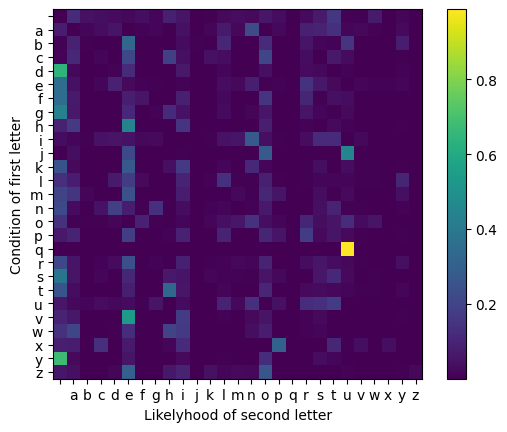

In [7]:
keyrange = np.arange(key.size)
plt.imshow(known_prob_array)
plt.xticks(keyrange, key)
plt.yticks(keyrange, key)
plt.ylabel("Condition of first letter")
plt.xlabel("Likelyhood of second letter")
plt.colorbar()
plt.show()

In [8]:
print(np.amax(known_prob_array))
print(np.amin(known_prob_array))
print(useful_functions.calculate_likelyhood(text, known_prob_array))

0.9881255301102629
1.767793281324855e-06
488459.50229739066


In [9]:
unknown_text = useful_functions.convert_text_to_array('unknown.txt')

with open('unknown.pickle', 'wb') as file:
    pickle.dump(unknown_text, file)

In [10]:
with open('unknown.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

In [11]:
unknown_prob_array = useful_functions.find_probability_array(unknown_text)
print(unknown_prob_array)
print(useful_functions.calculate_likelyhood(unknown_text, known_prob_array))

[[0.01785714 0.01785714 0.08928571 0.01785714 0.17857143 0.01785714
  0.01785714 0.01785714 0.01785714 0.07142857 0.01785714 0.01785714
  0.05357143 0.01785714 0.08928571 0.01785714 0.01785714 0.01785714
  0.01785714 0.03571429 0.01785714 0.03571429 0.01785714 0.10714286
  0.01785714 0.01785714 0.01785714]
 [0.00990099 0.03960396 0.14851485 0.00990099 0.11881188 0.00990099
  0.00990099 0.00990099 0.00990099 0.17821782 0.00990099 0.00990099
  0.04950495 0.0990099  0.01980198 0.00990099 0.00990099 0.00990099
  0.00990099 0.14851485 0.00990099 0.00990099 0.00990099 0.01980198
  0.00990099 0.00990099 0.00990099]
 [0.02181818 0.02909091 0.01454545 0.02909091 0.00727273 0.06545455
  0.01454545 0.00363636 0.09454545 0.02545455 0.24363636 0.00363636
  0.07636364 0.04727273 0.00363636 0.12727273 0.00363636 0.01090909
  0.01818182 0.10909091 0.00363636 0.01454545 0.00363636 0.00363636
  0.01818182 0.00363636 0.00363636]
 [0.05128205 0.07692308 0.05128205 0.02564103 0.02564103 0.02564103
  0.0256

In [12]:
print(np.amax(unknown_prob_array))
print(np.amin(unknown_prob_array))

0.4406779661016949
0.002631578947368421


In [13]:
likelyhood_array = np.array([useful_functions.calculate_likelyhood(unknown_text, known_prob_array)])#useful_functions.calculate_difference(known_prob_array, unknown_prob_array)])
old_working_key = copy.copy(key)
new_text = copy.copy(unknown_text)
best_key = copy.copy(key)

In [14]:
T = 10
T_stop = 0.0000001
T_decimation = 0.999
T_counter = 0
T_loop_max = 50

while T > T_stop:
    # generate a new key by swapping a character
    working_key, swapped_chars = useful_functions.swap_char(old_working_key)
    # translate text and generate probability array with it
    new_text = useful_functions.swap_text(new_text, swapped_chars)
    #working_prob_array = useful_functions.find_probability_array(new_text)
    # calculate the new likelyhood
    likelyhood = useful_functions.calculate_likelyhood(new_text, known_prob_array)
    # if the likelyhood is more than the old likelyhood, assign it as the best and continue working with it
    if likelyhood > likelyhood_array[-1]:
        print(likelyhood)
        likelyhood_array = np.append(likelyhood_array, likelyhood)
        if likelyhood > np.max(likelyhood_array):
            print(f'best value so far: {likelyhood}')
            best_key = copy.copy(working_key)
        old_working_key = copy.copy(working_key)
    # if the likelyhood is not more, perform our random chance moment,
    # if we pass, continue working with it but do not assign it as best
    # the original algorithm did not have a simulated annealing value, but I added one because it seemed like the professor wanted it
    elif np.exp(-(likelyhood_array[-1] - likelyhood)/T) > random.uniform(0, 1):
        likelyhood_array = np.append(likelyhood_array, likelyhood)
        old_working_key = copy.copy(working_key)
    # this is just to swap the text back
    else:
        new_text = useful_functions.swap_text(new_text, swapped_chars)

    # here we check if it is time to cool down
    if T_counter >= T_loop_max:
        T_counter = 0
        T *= T_decimation
    else:
        T_counter += 1

75.4445971775041
69.23347483615461
69.66417058993079
74.81851315519539
78.88230725296636
80.92572010071812
91.00786646778123
72.24645272335897
81.22205869778217
84.10201980724571
79.41350562982575
88.21927792185718
89.10134084834792
93.16647332444285
96.08137084794241
96.08137084794241
101.60682127911801
102.33125513203234
106.10705762973858
119.53510896014245
129.86296885887327
117.18806321512139
119.4930616051505
113.94813229515474
115.79997514404549
118.53740860627182
118.53740860627182
120.26031272018119
110.52561387972943
110.5354181902558
104.60362539777817
104.58409435720189
98.54552623193192
86.61503414252938
98.5461126900041
102.76384375408588
109.2335156364274
112.78422884436603
143.83314116763933
123.6133090894159
127.60297969482252
131.64119695340068
133.61220209106233
147.27112491648043
147.6391785125081
148.00527192172015
148.68716749623889
153.67479343973076
161.2772327329967
161.84969581470992
166.4676903036771
167.5110342041416
164.18239599424845
152.00704210061852
152

KeyboardInterrupt: 

In [ ]:
plt.plot(likelyhood_array)
plt.show()

In [ ]:
print(best_key)

In [ ]:
with open('unknown.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

translated_text = useful_functions.translate_text(unknown_text, best_key)
print(''.join(translated_text))

In [ ]:
with open('unknown.pickle', 'rb') as file:
    unknown_text = pickle.load(file)

translated_text = useful_functions.other_translate_text(unknown_text, best_key)
print(''.join(translated_text))